## Feature Engineering and Polynomial Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import zscore_normalize_features, run_gradient_descent_feng

np.set_printoptions(precision=2)

Iteration         0, Cost: 1.65756e+03
Iteration       100, Cost: 6.94549e+02
Iteration       200, Cost: 5.88475e+02
Iteration       300, Cost: 5.26414e+02
Iteration       400, Cost: 4.90103e+02
Iteration       500, Cost: 4.68858e+02
Iteration       600, Cost: 4.56428e+02
Iteration       700, Cost: 4.49155e+02
Iteration       800, Cost: 4.44900e+02
Iteration       900, Cost: 4.42411e+02
w,b found by gradient descent: w: [18.7], b: -52.0834


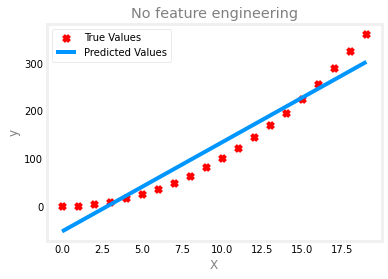

In [19]:
# Basic Example

# Target data
x = np.arange(0, 20, 1)
y = 1 + x**2
X = x.reshape(-1, 1)

model_w, model_b = run_gradient_descent_feng(X, y, iterations=1000, alpha=1e-2)

plt.scatter(x, y, marker='x', c='r', label='True Values')
plt.title("No feature engineering", c='gray')
plt.plot(x, X @ model_w + model_b, label="Predicted Values")
plt.xlabel("X", c='gray')
plt.ylabel("y", c='gray')
plt.legend()
plt.show()

In [12]:
# Aside: Hey, look, '@' to matrix multiply!
np.array([1,2,3]).reshape(-1,1) @ np.array([[1,2,3]])

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

See? Linear no es bueno.
Based on intuition, it looks like a 2nd degree polynomial,
the right half of a squared function.

Iteration         0, Cost: 7.32922e+03
Iteration      1000, Cost: 2.24844e-01
Iteration      2000, Cost: 2.22795e-01
Iteration      3000, Cost: 2.20764e-01
Iteration      4000, Cost: 2.18752e-01
Iteration      5000, Cost: 2.16758e-01
Iteration      6000, Cost: 2.14782e-01
Iteration      7000, Cost: 2.12824e-01
Iteration      8000, Cost: 2.10884e-01
Iteration      9000, Cost: 2.08962e-01
w,b found by gradient descent: w: [1.], b: 0.0490


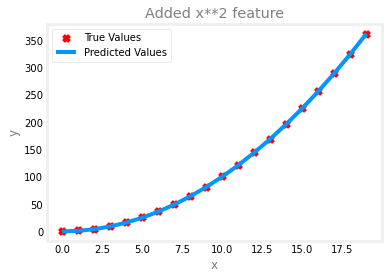

In [29]:
X = (x ** 2).reshape(-1, 1)
# Much bigger, so probably need more iters and lower alpha:
model_w, model_b = run_gradient_descent_feng(X, y, iterations=10000, alpha=1e-5)
plt.scatter(x, y, marker='x', c='r', label="True Values")
plt.title("Added x**2 feature", c='gray')
plt.plot(x, X @ model_w + model_b, label="Predicted Values")
plt.xlabel("x", c='gray')
plt.ylabel("y", c='gray')
plt.legend()
plt.show()

Wow, almost perfect, almost like we had a trivially simple dataset!
Note the values of w, b => $1 * x^2 + 0.049$ which is damn close to what we
set $y$ to be ($1 + x^2$ from above)

But what if we don't know that it should be a 2nd degree fit?
We can try with many features and just see what we get:

Iteration         0, Cost: 1.16185e+03
Iteration      1000, Cost: 3.41682e+02
Iteration      2000, Cost: 2.91529e+02
Iteration      3000, Cost: 2.48739e+02
Iteration      4000, Cost: 2.12231e+02
Iteration      5000, Cost: 1.81082e+02
Iteration      6000, Cost: 1.54507e+02
Iteration      7000, Cost: 1.31833e+02
Iteration      8000, Cost: 1.12487e+02
Iteration      9000, Cost: 9.59823e+01
w,b found by gradient descent: w: [0.03 0.08 0.55 0.03], b: 0.0110


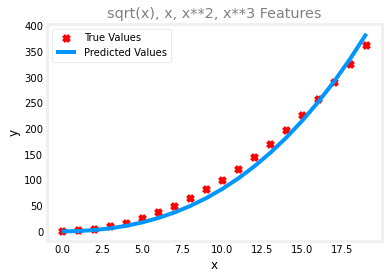

In [30]:
X = np.c_[x**(1/2), x, x**2, x**3]
model_w, model_b = run_gradient_descent_feng(X, y, iterations=10000, alpha=1e-7)
plt.scatter(x, y, marker='x', c='r', label='True Values')
plt.title('sqrt(x), x, x**2, x**3 Features', c='gray')
plt.plot(x, X @ model_w + model_b, label="Predicted Values")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Now note, assuming roughly same values on each run, $w, b \implies$

$\large \hat y = 0.03 * \sqrt x + 0.08 x + 0.55 * x^2 + 0.03 * x^3 + 0.011$

This shows how little all the features matter compared to $x^2$

There is still some effect from the other exponentiations (?) of $x$, but nowhere near as useful, so it is likely to be way more efficient to just drop them.

Alternatively, we can consider that once we have the new features, we are using **linear** regression on those *polynomialized* features - that is the best features will be linear compared to the target, as shown below:

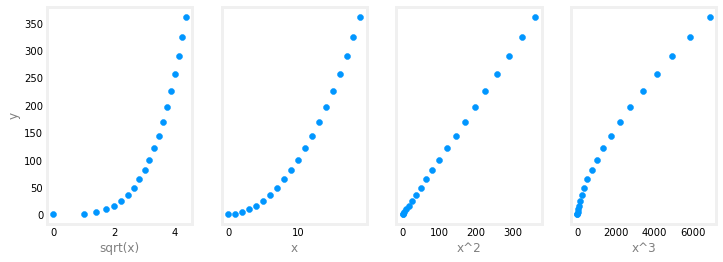

In [35]:
X = np.c_[x**(1/2), x, x**2, x**3]
X_feats = ['sqrt(x)', 'x', 'x^2', 'x^3']

fig, ax = plt.subplots(1, 4, figsize=(12, 4), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i], y)
    ax[i].set_xlabel(X_feats[i], c='gray')
ax[0].set_ylabel('y', c='gray')
plt.show()

So with this linear relation, regular linear regression works well.

However, let's make it more efficient still, by feature-scaling.

In [36]:
print(f"Peak-to-peak range by column in unscaled X:\n{np.ptp(X, axis=0)}")

X = zscore_normalize_features(X)
print(f"Peak-to-peak range by column in normalized X:\n{np.ptp(X, axis=0)}")

Peak-to-peak range by column in unscaled X:
[4.36e+00 1.90e+01 3.61e+02 6.86e+03]
Peak-to-peak range by column in normalized X:
[3.79 3.3  3.18 3.28]


With this much nicer spread, try again with a **much** bigger $\alpha$:

Iteration         0, Cost: 8.87813e+03
Iteration     10000, Cost: 5.84615e-01
Iteration     20000, Cost: 3.12597e-01
Iteration     30000, Cost: 1.67148e-01
Iteration     40000, Cost: 8.93749e-02
Iteration     50000, Cost: 4.77893e-02
Iteration     60000, Cost: 2.55532e-02
Iteration     70000, Cost: 1.36635e-02
Iteration     80000, Cost: 7.30593e-03
Iteration     90000, Cost: 3.90653e-03
w,b found by gradient descent: w: [ -0.63   1.95 110.8    1.38], b: 124.5000


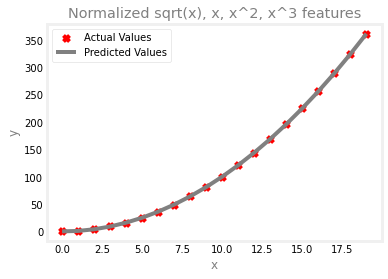

In [42]:
model_w, model_b = run_gradient_descent_feng(X, y, iterations=100000, alpha=1e-1)
plt.scatter(x, y, marker='x', c='r', label="Actual Values")
plt.title("Normalized sqrt(x), x, x^2, x^3 features", c='gray')
plt.plot(x, X @ model_w + model_b, label="Predicted Values", c='gray')
plt.xlabel('x', c='gray')
plt.ylabel('y', c='gray')
plt.legend()
plt.show()

Varying numbers of iterations give us basically the same fit at some point, but wildly differing $\bf w$ values! Neat.

Either way, we converge much quicker.

We're not limited to such simple curves, either; 

Iteration         0, Cost: 2.20715e-01
Iteration     10000, Cost: 2.71839e-02
Iteration     20000, Cost: 2.10032e-02
Iteration     30000, Cost: 1.70362e-02
Iteration     40000, Cost: 1.40662e-02
Iteration     50000, Cost: 1.18280e-02
Iteration     60000, Cost: 1.01381e-02
Iteration     70000, Cost: 8.85931e-03
Iteration     80000, Cost: 7.88881e-03
Iteration     90000, Cost: 7.14954e-03
w,b found by gradient descent: w: [ 1.52 -8.    8.69  6.01 -1.58 -5.54 -5.33 -2.79  0.26  2.57  3.51  2.84
  0.59 -3.09], b: -0.0073


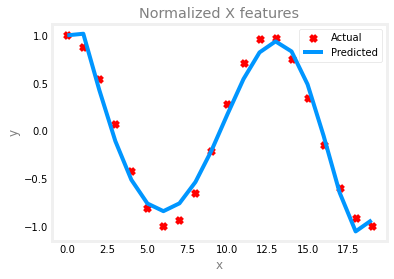

In [45]:
y = np.cos(x / 2)
X = np.c_[x ** (1/2), x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X = zscore_normalize_features(X)

model_w, model_b = run_gradient_descent_feng(X, y, iterations=100_000, alpha=1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual")
plt.title("Normalized X features", c='gray')
plt.plot(x, X @ model_w + model_b, label="Predicted")
plt.xlabel('x', c='gray')
plt.ylabel('y', c='gray')
plt.legend()
plt.show()